# AmadeusGPT Demo: MABe dataset

- please get an openAI user key: https://platform.openai.com/api-keys.
- We suggest to run the demos locally, but it can be viewed on Google Colab. Some interactive features might not be available.

In [1]:
!pip install --pre amadeusgpt

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode

In [3]:
import os
from dotenv import load_dotenv
load_dotenv('../.env')

mykey = os.getenv("OPENROUTER_API_KEY")

In [4]:
from amadeusgpt.utils.openai_adapter import OpenAIAdapter

client = OpenAIAdapter(api_key=mykey).get_client()

response = client.chat.completions.create(
    model="thudm/glm-z1-32b:free",
    messages=[{"role": "user", "content": "Hello AmadeusGPT"}]
)
print(response.choices[0].message.content)

/Users/akshaypardhanani/Desktop/python-projects/AmadeusGPT/.venv/lib/python3.11/site-packages/cebra/integrations/sklearn/cebra.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
INFO:httpx:HTTP Request: GET https://api.openai.com/v1/models "HTTP/1.1 401 Unauthorized"
INFO:httpx:HTTP Request: GET https://openrouter.ai/api/v1/models "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3
INFO:httpx:HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"


>Hello! How can I assist you today?

Hello! How can I assist you today?

Alright, let me break down the user's initial message. They addressed the AI as "AmadeusGPT," which combines the name of Wolfgang Amadeus Mozart with a GPT model. This likely indicates an expectation of creative, knowledge-driven, or culturally informed assistance. The greeting is simple, so my response should mirror that with warmth and openness.

Next, I need to determine the user's intent. Since it's a greeting, they might be testing the AI's responsiveness, exploring its capabilities, or preparing to ask a question. The example provided shows a brief response followed by a detailed thought process. To align with that structure, I should first craft an engaging reply ("Hello! How can I assist you today?"), then document my reasoning in the specified XML format.

Considering the name "Amadeus," I might need to contextualize responses with artistic or historical references if the user's queries lean that way. How

In [5]:
from amadeusgpt import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from amadeusgpt.utils import parse_result
from pathlib import Path
import matplotlib.pyplot as plt
from amadeusgpt import create_project

## Please upload the demo video and associated files:
- you can grab it from here: https://github.com/AdaptiveMotorControlLab/AmadeusGPT/tree/mwm/docs/examples/MABe

In [6]:
amadeus_root = Path(amadeusgpt.__file__).parent.parent

kwargs = {
    "keypoint_info.body_orientation_keypoints.neck" : "nose",
    "keypoint_info.body_orientation_keypoints.tail_base" : "tail base",
    "keypoint_info.body_orientation_keypoints.animal_center" : "neck",
    "keypoint_info.head_orientation_keypoints.nose" : "nose",
    "keypoint_info.head_orientation_keypoints.neck" : "neck",
    "video_info.scene_frame_number" : 1400,
}

llm_info = {"llm_info": {"max_tokens": 4096, 
                     "temperature": 0.0, 
                     # let's use the best model by default
                     "gpt_model": "thudm/glm-z1-32b:free",
                     "keep_last_n_messages": 2}
        }

config = create_project(data_folder = "../examples/MABe", # check the path to the data folder
                        result_folder = "results",
                        **kwargs,
                        **llm_info,
                        )

amadeus = AMADEUS(config, use_vlm=False)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)

2025-08-10 14:10:52.513 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:10:52.513 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-08-10 14:10:52.514 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:10:52.514 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Project created at results. Results will be saved to results
The project will load video files (*.mp4) and optionally keypoint files from ../examples/MABe
A copy of the project config file is saved at results/config.yaml
{'data_info': {'data_folder': '../examples/MABe',
               'result_folder': 'results',
               'video_suffix': '.mp4'},
 'keypoint_info': {'body_orientation_keypoints': {'animal_center': 'neck',
                                                  'neck': 'nose',
                                                  'tail_base': 'tail base'},
                   'head_orientation_keypoints': {'neck': 'neck',
                                                  'nose': 'nose'},
                   'include_confidence': False,
                   'use_3d': False},
 'llm_info': {'gpt_model': 'thudm/glm-z1-32b:free',
              'keep_last_n_messages': 2,
              'max_tokens': 4096,
              'temperature': 0.0},
 'object_info': {'load_objects_from_disk': False

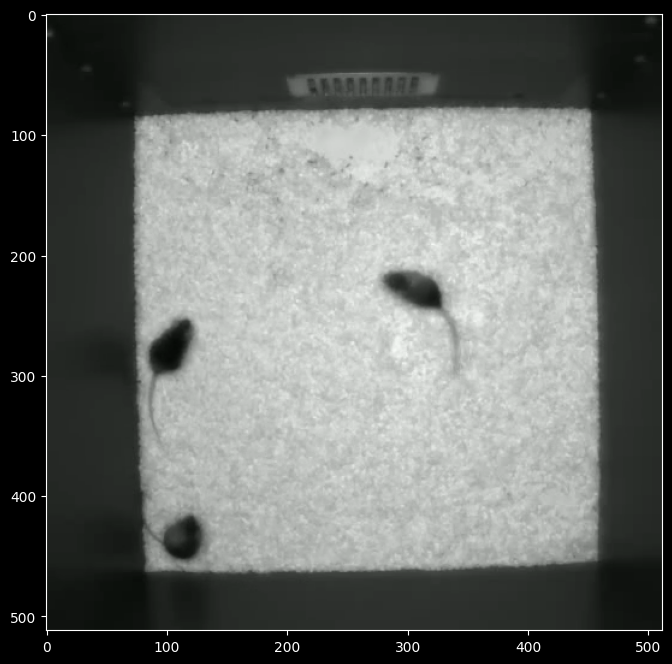

In [7]:
behavior_analysis = amadeus.get_behavior_analysis(video_file_path='../examples/MABe/EGS8X2MN4SSUGFWAV976.mp4', # check the path to the video file
                                                  keypoint_file_path='../examples/MABe/EGS8X2MN4SSUGFWAV976.h5') # check the path to the keypoint file
scene_image = behavior_analysis.visual_manager.get_scene_image()
plt.imshow(scene_image)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0 $
current input tokens 3007
current accumulated tokens 3906


```python
def get_watching_events(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    '''
    analysis = create_analysis(identifier)
    # Define the three conditions as separate queries
    cross_animal_query_list = [
        'distance>50', 
        'distance<260', 
        'relative_head_angle<15'
    ]
    # Get events satisfying all three conditions with smoothing
    watching_events = analysis.get_animals_animals_events(
        cross_animal_query_list=cross_animal_query_list,
        smooth_window_size=15
    )
    return watching_events
```

Key implementation details:
1. The three conditions are combined using logical_and by default in get_animals_animals_events
2. smooth_window_size=15 is explicitly set as per user requirement
3. The distance condition is split into two inequalities (50 < distance < 260)
4. The head angle condition uses the relative_head_angle metric
5. No bodypart filtering is needed since the queries are between animals
6. The function signature follows the required format (def ... (identifier):)

Note: The actual implementation would need to ensure that the distance and angle metrics are correctly calculated between animals, but based on the provided API documentation, this is the correct way to structure the query.

videos generated to defaultdict(<class 'list'>, {<amadeusgpt.behavior_analysis.identifier.Identifier object at 0x17fc2bfd0>: ['results/EGS8X2MN4SSUGFWAV976_get_watching_events_video_0.mp4', 'results/EGS8X2MN4SSUGFWAV976_get_watching_events_video_1.mp4', 'results/EGS8X2MN4SSUGFWAV976_get_watching_events_video_2.mp4', 'results/EGS8X2MN4SSUGFWAV976_get_watching_events_video_3.mp4']})
Open it with media player if it does not properly display in the notebook


[<amadeusgpt.analysis_objects.event.Event object at 0x3b1c72950>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72ad0>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72290>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72c10>]

[<amadeusgpt.analysis_objects.event.Event object at 0x3b1c72950>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72ad0>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72290>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72c10>]

[<amadeusgpt.analysis_objects.event.Event object at 0x3b1c72950>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72ad0>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72290>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72c10>]

[<amadeusgpt.analysis_objects.event.Event object at 0x3b1c72950>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72ad0>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72290>, <amadeusgpt.analysis_objects.event.Event object at 0x3b1c72c10>]

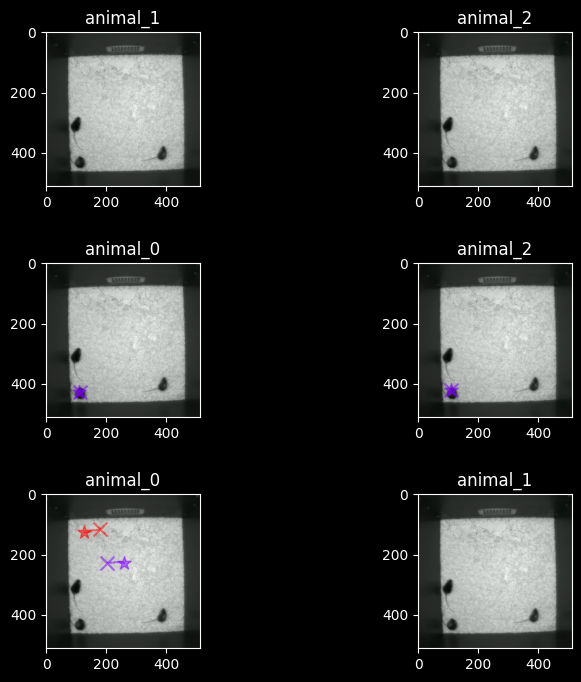

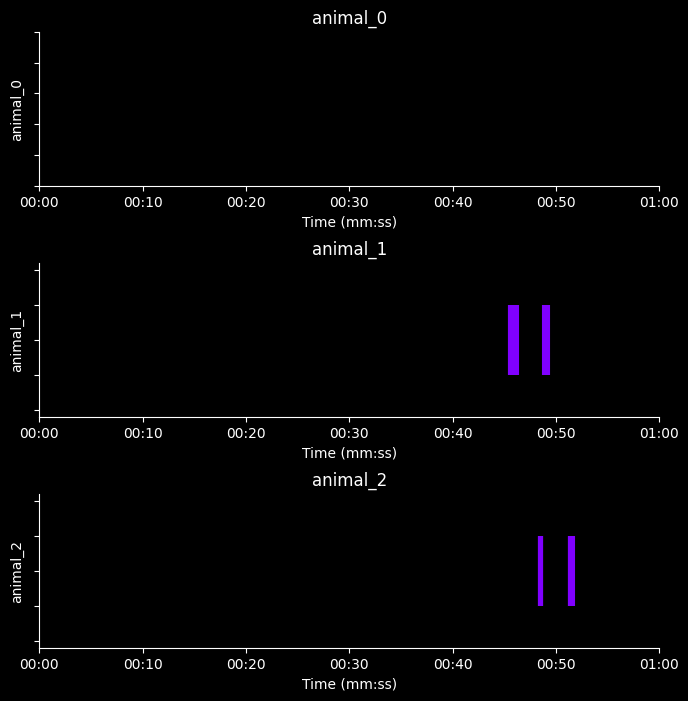

In [8]:
query = "Define watch as a social behavior where distance between animals is less than 260  \
and larger than 50 and head angle between animals is less than 15. The smooth_window_size is 15. Get watching"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

### You can get a list of binary masks (equivalent to ethogram) for the underlying behavior, if your query is about retriving a described behavior

In [9]:
# the return masks is of shape (num_of_events, video_length)
# where each boolean array of (video_length,) is binary where True indicates whether the behavior is happening at that frame
masks = qa_message.get_masks()
print (masks)

{<amadeusgpt.behavior_analysis.identifier.Identifier object at 0x17fc33150>: array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(4, 1800))}
